In [358]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy
import math
import tqdm
from datetime import datetime
from sklearn.model_selection import train_test_split
import traceback

In [448]:
filename = "data"
df = pd.read_csv(f'{filename}.txt', header = None, sep=", ", names=["x", 'y'], engine='python')
operators1 = ['+', '-', '*', '/', 'sin', 'cos', 'const', 'x']
operators2 = ['const', 'x']

num_evaluation = 50
depth = 8

x_s = df["x"].to_numpy()
y_s = df["y"].to_numpy()
y_s = [float(y) for y in y_s]

df.head()

,x,y
0,0.0299,1.0130
1,0.0329,1.0140
2,0.1084,1.0280
3,0.1411,1.0264
4,0.1535,1.0245


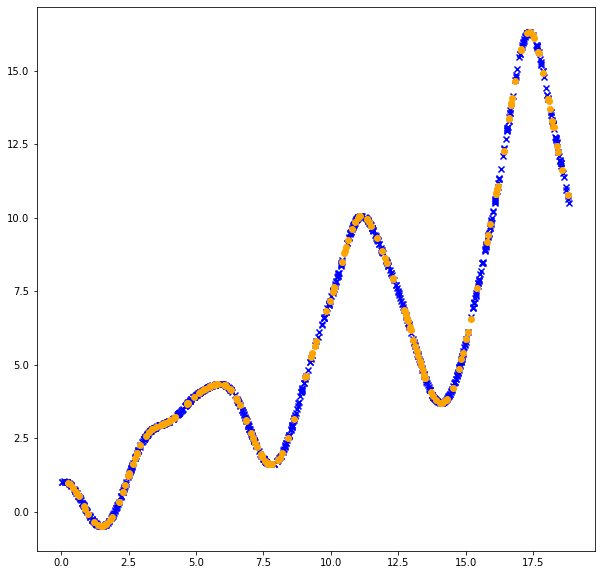

In [360]:
X_train, X_test, y_train, y_test = train_test_split(x_s, y_s, test_size=0.2)
plt.figure(figsize=(10,10))
plt.scatter(X_train, y_train,color='blue', marker='x');
plt.scatter(X_test, y_test,color='orange');

In [425]:
def find_all_children(arr):
    """
    random pick a parent node and return it in a list with ALL its children (children, grand-children)  
    """
    
    res = []
    ptr = 0
    n = random.randint(2*len(arr)//5, len(arr)//2) # len(arr)-1
    res.append(n)
    
    while res[ptr] <= len(arr)-1:
        if 2 * res[ptr] <= len(arr)-1:
            res.append(2*res[ptr])
        else: break
        if 2 * res[ptr] + 1 <= len(arr)-1:
            res.append(2*res[ptr]+1)
        else: break
            
        ptr += 1
    return res


def merge(dict1, dict2):
    """merge two dictionaries"""
    res = {**dict1, **dict2}
    return res

In [426]:
def random_generate(depth):
    """
    generate a sequence of binary heap
    INPUTS:
        depth: depth of the binary tree -> int
    
    OUTPUT:
        binary heap
    """
    
    max_length = 2 ** depth - 1
    
    length = random.randint(1, max_length)
    first_half = length//2
    second_half = length - first_half
    
    res = ['nah']
    
    for i in range(1, first_half):
        pick = random.choice(operators1)
        
        if (pick == res[i-1]) and (res[i//2] == '-'):
            tmp = copy.deepcopy(operators1)
            tmp.remove(res[i-1])
            pick = random.choice(tmp)
            
        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
            
        res.append(pick)
        
    for i in range(first_half, length):
        
        pick = random.choices(population=operators2, weights=(0.9, 0.1))[0]
        
        if (pick == res[i-1]) and (res[i//2] == '-'):
            tmp = copy.deepcopy(operators2)
            tmp.remove(res[i-1])
            pick = random.choice(tmp)
            
        if pick == "const":
            pick = round(random.random() * 10 + 0.1, 4)
            
        res.append(pick)
        
    return res

In [427]:
def mutate(binary_heap, mutate_rate):
    
    binaryheap = copy.deepcopy(binary_heap)
    
    ptr = random.randint(1, len(binaryheap)-1)
    
    if ptr < len(binaryheap)//2:
        pick = random.choice(operators1)
        
        if (pick == binaryheap[ptr-1]) and (binaryheap[ptr//2] == '-'):
            tmp = copy.deepcopy(operators1)
            tmp.remove(binaryheap[ptr-1])
            pick = random.choice(tmp)       
        
    else:
        pick = random.choice(operators2)
        
        if (pick == binaryheap[ptr-1]) and (binaryheap[ptr//2] == '-'):
            tmp = copy.deepcopy(operators2)
            tmp.remove(binaryheap[ptr-1])
            pick = random.choice(tmp)
        
    if pick == "const":
        pick = round(random.random() * 10 + 0.1, 4)
        
    binaryheap[ptr] = pick

    return binaryheap

In [440]:
def evaluate_binary_heap(binary_heap, x):
    
    """
    Evaluate binary from back to front
    
    """
    
    bh = copy.deepcopy(binary_heap)
    for i in range(len(bh)-1, 0, -1):
        try:
            if bh[i] == 'x':
                bh[i] = x

            elif bh[i] == '+':

                bh[i] = bh[2*i] + bh[2*i+1]

            elif bh[i] == '-':

                bh[i] = bh[2*i] - bh[2*i+1]

            elif bh[i] == '*':

                bh[i] = bh[2*i] * bh[2*i+1]

            elif bh[i] == '/':

                bh[i] = bh[2*i] / bh[2*i+1]

            elif bh[i] == 'sin':

                bh[i] = np.sin(bh[2*i])

            elif bh[i] == 'cos':

                bh[i] = np.cos(bh[2*i])
        except:
#             return random.random()
#             return 0
            pass
#             print(f"Math invalid")
#             print(binary_heap)
            
    return bh[1]

In [441]:
def calculate_y(x_s, equation):
    calculated_y = []
    for ele in x_s:
        res = evaluate_binary_heap(equation, x=ele)
        calculated_y.append(res)
    return calculated_y

In [411]:
a = random_generate(depth=4)
b = random_generate(depth=4)
print(f"a = {a}")
print(f"b = {b}")

print(f"evaluate a: {evaluate_binary_heap(a, x=2)}")
print(f"evaluate a: {evaluate_binary_heap(b, x=2)}")
crossover(a,b)

a = ['nah', 8.6902, 4.5474, '-', 'cos', '-', 1.3556, 8.4733, 6.3278, 2.2545, 1.875, 4.1004, 3.7527, 0.6991]
b = ['nah', '-', '*', '-', 'cos', '/', 1.7755, 7.2035, 9.8884, 1.4087, 4.7824, 'x', 5.839]
evaluate a: 8.6902
evaluate a: 3.2892183578522216


[['nah',
  8.6902,
  4.5474,
  '-',
  'cos',
  '-',
  1.3556,
  8.4733,
  6.3278,
  2.2545,
  1.875,
  7.2035,
  3.7527,
  0.6991],
 ['nah',
  '-',
  '*',
  '-',
  'cos',
  '/',
  1.7755,
  4.1004,
  9.8884,
  1.4087,
  4.7824,
  'x',
  5.839]]

In [412]:

equ = ['nah', "+", 'x', 3]
x = [1,2,3,4,5]
calculate_y(x, equ)

[4, 5, 6, 7, 8]

In [413]:
def calculate_mse(y, y_hat):
    """
    use np to calculate mse
    """
#     calculated_y = np.array(calculate_y(x_s, equation=equation))
#     calculated_y = [x.astype(float) for x in calculated_y] # cast to np.float
#     y = [n.astype(float) for n in y]
#     y_hat = [n.astype(float) for n in y_hat]
    print(len(y) == len(y_hat))
    y = np.array(y)
    y_hat = np.array(y_hat)
    mse = np.square(np.subtract(y, y_hat)).mean()
    return mse  

In [ ]:
def calc_mse(y, y_hat):
    """
    home-made mse calculation
    """
    errors_sq = []
    tmp = 0
    for i in range(len(y)):
        try:
            e = (y[i] - y_hat[i]) ** 2
            tmp = e
        except TypeError:
#             print(f"y[i] = {y[i]}")
#             print(f"y_hat[i] = {y_hat[i]}")
            pass
        errors_sq.append(tmp)
    return round(sum(errors_sq)/len(errors_sq), 8)

In [ ]:
a = [45,46,34,63,75]
b = [21,64,23,64,23]
print(calc_mse(a,b))

In [ ]:
def generate_population(population, depth):
    """
    generate some number of population
    """
    pool = {}
    
    for i in range(population):
        equation = random_generate(depth)
        y_calculated = calculate_y(x_s, equation=equation)
        mse = calc_mse(y_calculated, y_s)
        
        pool[mse] = equation
    
    return pool

In [387]:
def crossover(parent1, parent2):
    """
    crossover operation
    1. random pick a point at parent1
    2. random pick a point at parent2
    3. completely swap the points and their children
    4. return two trees
    """
    
    p1 = copy.deepcopy(parent1)
    p2 = copy.deepcopy(parent2)
    
    rm_idxs1 = find_all_children(p1) # top node and its grand-grandchildren - random
    rm_idxs2 = find_all_children(p2) # top node and its grand-grandchildren - random
    
#     print(rm_idxs1)
#     print(rm_idxs2)
    
    removed1 = [p1[x] for x in rm_idxs1] 
    removed2 = [p2[x] for x in rm_idxs2]
    
    for idx in rm_idxs1:
        p1[idx] = 'nah'
    
    for idx in rm_idxs2:
        p2[idx] = 'nah' 
        
        
    # if they are in the same length
    if len(removed1) == len(removed2):
        for ele in removed1:
            for i in range(1, len(p2)):
                if p2[i] == "nah":
                    p2[i] = ele
                    break
                    
        for ele in removed2:
            for i in range(1, len(p1)):
                if p1[i] == "nah":
                    p1[i] = ele
                    break
    
    # if not
    elif len(removed1) > len(removed2):

        ptr_rm = 0
        ptr_idx = 0
        while ptr_rm < len(removed1):
            while ptr_idx < len(rm_idxs2): 
                p2[rm_idxs2[ptr_idx]] = removed1[ptr_rm]
                ptr_idx += 1
                ptr_rm += 1
                
            p2.append(removed1[ptr_rm])
            ptr_rm += 1
            
        for ele in removed2:
            for idx in rm_idxs1:
                p1[idx] = ele
                break                   
    else:
        ptr_rm = 0
        ptr_idx = 0
        while ptr_rm < len(removed2):
            while ptr_idx < len(rm_idxs1): 
                p1[rm_idxs1[ptr_idx]] = removed2[ptr_rm]
                ptr_idx += 1
                ptr_rm += 1

            p1.append(removed2[ptr_rm])
            ptr_rm += 1
            
        for ele in removed1:
            for idx in rm_idxs2:
                p2[idx] = ele
                break        

         
    for i in range(1, len(p1)):
        if p1[i] == 'nah':
            p1[i] = 'x'
#             p1[i] = round(random.random() * 10 + 0.1, 4) # not the best
    for i in range(1, len(p2)):
        if p2[i] == 'nah':
            p2[i] = 'x'
#             p2[i] = round(random.random() * 10 + 0.1, 4) # not the best
                
    child1 = p1
    child2 = p2
        
    return [child1, child2]


In [388]:
a = ['nah',1,2,3,4,5,6,7,8,9]
b = ['nah','a', 'b', 'c', 'd', 'e', 'f', 'g']

crossover(a,b)

[['nah', 1, 2, 3, 4, 5, 'b', 7, 8, 9, 'd', 'e'],
 ['nah', 'a', 6, 'c', 'x', 'x', 'f', 'g']]

In [ ]:
def random_search(num, x_s, y_s, depth):
    
    """
    random search
    """
    evaluation = []
    error = []
    final_equation = []
    y_calculated = []
    
    for i in range(num):
        
        if i % 100 == 0:
            print(f"{i/num_evaluation * 100} % complete")

        calculated_y = []
        
        equation = random_generate(depth=depth)
        
        for ele in x_s:
            res = evaluate_binary_heap(equation, x=ele)
            calculated_y.append(res)
            
        calculated_y = np.array(calculated_y)
        try:
            mse = (np.square(y_s - calculated_y)).mean(axis=0)
        except:
            print("raise MSE error")
        
        if len(error) == 0:
            error.append(mse)
            evaluation.append(i)
            final_equation = equation
            y_calculated = calculated_y
            
        elif mse < error[-1]:
            error.append(mse)
            evaluation.append(i)
            final_equation = equation
            y_calculated = calculated_y
            
    return [evaluation, error, final_equation, y_calculated]

In [ ]:
def random_mutation_hill_climber(num, x_s, y_s, depth):
    """
    random hill climber
    """
    
    evaluation = []
    error = []
    final_equation = []
    y_calculated = []
    
    
    first_gen = random_generate(depth=depth)
    y_cal = calculate_y(x_s=x_s, equation=first_gen)
    mse = calculate_mse(y_s, y_cal)
    
    for i in range(0, num):
        
        mutant = mutate(first_gen)
        calculated_y = calculate_y(x_s, equation=mutant)
        mse = calculate_mse(calculated_y, y_s)
        
        if len(error) == 0:
            error.append(mse)
            evaluation.append(i)
            final_equation = mutant
            y_calculated = calculated_y

        elif mse < error[-1]:
            error.append(mse)
            evaluation.append(i)
            final_equation = mutant
            y_calculated = calculated_y
            
        if i % 100 == 0:
            print(f"{i/num_evaluation * 100} % complete")
    
    return [evaluation, error, final_equation, y_calculated]

In [ ]:
def random_restart_hill_climber(num_eval, x_s, y_s, depth, num_tries):
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    counter = num_eval
    
    while counter > 0:
        
        first_gen = random_generate(depth=depth)
        y_cal = calculate_y(x_s=x_s, equation=first_gen)
        mse = calculate_mse(y_s, y_cal)
        
        if (num_eval - counter) % 100 == 0:
            print(f"{(num_eval - counter)/num_evaluation*100} % complete")
        
        counter -= 1
    
        if len(errors) == 0:
            errors.append(mse)
            evaluations.append(num_eval - counter)
            final_equation = first_gen
            y_calculated = calculate_y(x_s, equation=first_gen)
        
        while num_tries > 0 and counter > 0:
            
            mutant = mutate(first_gen)
            calculated_y = calculate_y(x_s, equation=mutant)
            new_mse = calculate_mse(calculated_y, y_s)
            
            if (num_eval - counter) % 100 == 0:
                print(num_eval - counter)
            
            if new_mse < errors[-1]:
                errors.append(new_mse)
                evaluations.append(num_eval - counter)
                final_equation = mutant
                y_calculated = calculate_y(x_s, mutant)
            else:
                num_tries -= 1
        
        if mse < errors[-1]:
            errors.append(mse)
            evaluations.append(num_eval - counter)
            final_equation = first_gen
            y_calculated = calculate_y(x_s, equation=first_gen)
            
    return [evaluations, errors, final_equation, y_calculated]

In [463]:
def evol_algo(num_eval, x_s, y_s, depth, init_pop):
    """
    selection 50%
    mutation are built-in to crossover
    """
    
    evaluations = []
    errors = []
    final_equation = []
    y_calculated = []
    
    counter = num_eval

    pool = generate_population(depth=depth, population=init_pop)
    print(f"pool = {len(pool)}")
    num_keys = len(pool)
    try:
        while counter > 0 and num_keys > 0:
            children_pool = {}

            keys = sorted(pool.keys(), reverse=False) 

            for i in range(0, len(keys)-1, 2):
                kid1, kid2 = crossover(pool[keys[i]], pool[keys[i+1]])

                y_hat_kid1 = calculate_y(x_s=x_s, equation=kid1)
                y_hat_kid2 = calculate_y(x_s=x_s, equation=kid2)
    #             children_pool[calculate_mse(y_s, y_hat_kid1)] = kid1
    #             children_pool[calculate_mse(y_s, y_hat_kid2)] = kid2

                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid1)] = kid1
                children_pool[calc_mse(y=y_s, y_hat=y_hat_kid2)] = kid2

            print(f"children pool = {len(children_pool)}")

            merge_pool = merge(children_pool, pool)
            print(f"merged pool = {len(merge_pool)}")

            pool = merge_pool

            temp_pool = {}

            keys = sorted(pool.keys(), reverse=False)
            half_keys = keys[0:7*(len(keys)//10)] # selection X%
            num_keys = len(half_keys)
            print(f"# of keys = {num_keys}")

            for i in range(num_keys): 
                temp_pool[keys[i]] = pool[keys[i]]
            print(f"top pool = {len(temp_pool)}")

            lowest_error = min(half_keys)
            print(f"lowest error = {lowest_error}")
            if (len(errors) == 0) or (lowest_error < errors[-1]):
                evaluations.append(num_eval - counter)
                final_equation = temp_pool[lowest_error]
                y_calculated = calculate_y(x_s, final_equation)
                errors.append(lowest_error)

            pool = temp_pool
            counter -= 1

    #         if counter % 10 == 0:
            print(f"counter = {num_eval - counter}")
    except ValueError:
        pass
    return [evaluations, errors, final_equation, y_calculated]

In [464]:
res_ea = evol_algo(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=depth, init_pop=10)
res_ea

pool = 8
children pool = 8
merged pool = 10
# of keys = 7
top pool = 7
lowest error = 23.46235624
counter = 1
children pool = 6
merged pool = 9
# of keys = 0
top pool = 0


[[0],
 [23.46235624],
 ['nah',
  'x',
  'x',
  '-',
  5.2507,
  'x',
  '/',
  'cos',
  '+',
  '-',
  'cos',
  '-',
  9.7567,
  'sin',
  '-',
  'cos',
  '*',
  'cos',
  'sin',
  '+',
  '+',
  'sin',
  '+',
  'cos',
  'x',
  '*',
  'x',
  '-',
  7.4783,
  1.165,
  8.7881,
  2.5512,
  1.8602,
  0.5163,
  2.9307,
  8.4282,
  8.0982,
  1.1044,
  6.4364,
  9.3807,
  7.9581,
  5.8972,
  0.6779,
  8.4608,
  9.8,
  5.0233,
  7.7178,
  9.8072,
  4.0612,
  0.7711,
  10.0357,
  1.9224,
  4.7259,
  'x',
  4.1427,
  9.2495,
  9.648],
 [0.0299,
  0.0329,
  0.1084,
  0.1411,
  0.1535,
  0.2139,
  0.2151,
  0.2217,
  0.2294,
  0.2688,
  0.2776,
  0.2995,
  0.315,
  0.32,
  0.3575,
  0.3674,
  0.3759,
  0.4512,
  0.4738,
  0.5085,
  0.5182,
  0.5292,
  0.549,
  0.5694,
  0.5779,
  0.5917,
  0.6341,
  0.6359,
  0.6494,
  0.6514,
  0.6811,
  0.6839,
  0.7106,
  0.7185,
  0.7799,
  0.7857,
  0.7866,
  0.8077,
  0.8176,
  0.8298,
  0.8329,
  0.8358,
  0.8376,
  0.9007,
  0.9022,
  0.9303,
  0.9327,
  0.9458

In [ ]:
res_rrhc = random_restart_hill_climber(num_eval=num_evaluation, x_s=x_s, y_s=y_s, depth=8, num_tries=10)

In [ ]:
res_rmhc = random_mutation_hill_climber(num=num_evaluation, x_s=x_s, y_s=y_s, depth=8)

In [433]:
res_rs = random_search(num=num_evaluation, x_s=x_s, y_s=y_s, depth=8)

0.0 % complete


In [ ]:
print(len(res_ea[0]))
print(len(res_ea[1]))
print(len(res_ea[2]))
print(len(res_ea[3]))

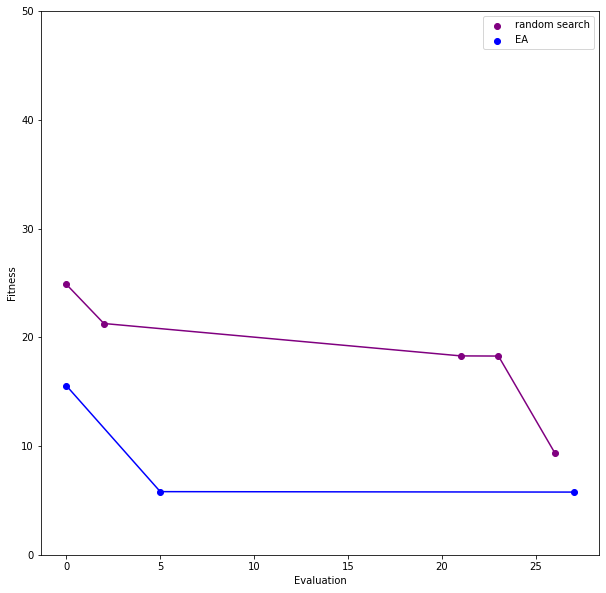

In [435]:
plt.figure(figsize=(10,10))
plt.scatter(res_rs[0], res_rs[1], color='purple', label='random search')
plt.plot(res_rs[0], res_rs[1], color='purple')

# plt.scatter(res_rmhc[0], res_rmhc[1], color='orange', label='random mutation hill climber')
# plt.plot(res_rmhc[0], res_rmhc[1], color='orange')

# plt.scatter(res_rrhc[0], res_rrhc[1], color='blue', label='random restart hill climber')
# plt.plot(res_rrhc[0], res_rrhc[1], color='blue')

plt.scatter(res_ea[0], res_ea[1], color='blue', label='EA')
plt.plot(res_ea[0], res_ea[1], color='blue')

plt.legend()

plt.ylim(0, 50)

plt.ylabel("Fitness")
plt.xlabel("Evaluation");

In [ ]:
res_rrhc[2]

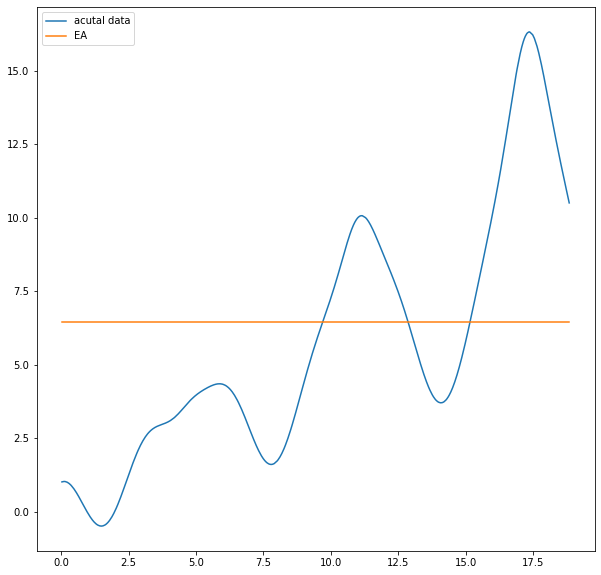

In [453]:
plt.figure(figsize=(10,10))
plt.plot(x_s, y_s, label="acutal data");
# plt.plot(x_s, res_rs[3], label="random search");
# plt.plot(x_s, res_rrhc[3], label="random restart HC");
# plt.plot(x_s, res_rmhc[3], label="random mutation HC");
plt.plot(x_s, res_ea[3], label="EA");
plt.legend()

In [ ]:
def save_data(result, title):
    today = datetime.now()
    d = today.strftime("%Y-%m-%d-%H-%M")
    path = "/Users/dxx0511a/Desktop/Columbia/MECS_4510_EA/hw2/output/" 
    
    df_plot = pd.DataFrame(data={'evaluation': result[0], 'mse': result[1]})
    df_graph = pd.DataFrame(data={"y_cal": result[3]})
    
    with open(f"{path}{d}_{title}_e{num_evaluation}_final_equation.txt",'w') as e:
            for ele in result[2]:
                e.write(str(ele))
                e.write('\n')
                

    df_plot.to_csv(f"{path}{d}_{title}_e{num_evaluation}_plot.csv", index=False)
    df_graph.to_csv(f"{path}{d}_{title}_e{num_evaluation}_graph.csv", index=False)


In [ ]:
# save_data(res_rs,title="rs")
# save_data(res_rmhc,title="rmhc")
# save_data(res_rrhc,title="rrhc")

In [ ]:
arr = [1,2,3,4]
def dummy(arr):
    for i in range(len(arr)):
        arr.remove(arr[i])
    return arr
dummy(arr)

In [ ]:
a =[1,2,3,4,5,6]
b = ['a','b']
i = 0
while i < len(a):
    for ele in b:
        print (ele)
    i += 1